In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/nicolasdrizard/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [25]:
# Loading data
with h5py.File('../plot_scores.hdf5', "r") as f:
    # format is (alpha_w, alpha_c, f, precision, recall)
    scores = np.array(f.get('scores'))

In [26]:
np.max(scores[:,2])

0.80794436271231773

In [27]:
print 'Best alpha_w ',scores[:,0][np.argmax(scores[:,2])]
print 'Best alpha_c ',scores[:,1][np.argmax(scores[:,2])]

Best alpha_w  0.1
Best alpha_c  8.0


In [28]:
best_w_ind = np.where(scores[:,0] == scores[:,0][np.argmax(scores[:,2])])
best_c_ind = np.where(scores[:,1] == scores[:,1][np.argmax(scores[:,2])])

In [29]:
scores[best_w_ind,3][0]

array([ 0.76077641,  0.76102293,  0.76092707,  0.76070529,  0.76057935,
        0.76006036,  0.76009053])

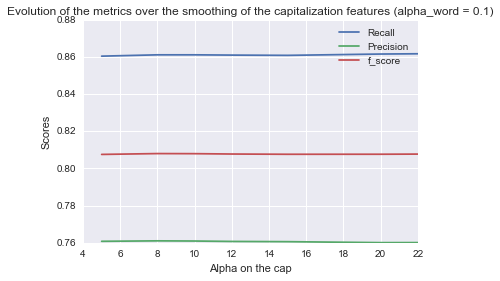

In [35]:
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,4][0], label='Recall')
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,3][0], label='Precision')
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,2][0], label='f_score')
#plt.xticks(scores[best_w, 1][0])
plt.title("Evolution of the metrics over the smoothing of the capitalization features (alpha_word = 0.1)")
plt.ylabel('Scores')
plt.xlabel('Alpha on the cap')
plt.legend()
plt.show()

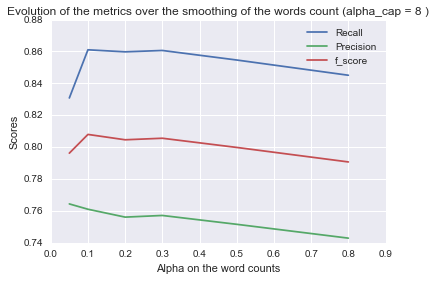

In [36]:
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,4][0], label='Recall')
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,3][0], label='Precision')
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,2][0], label='f_score')
#plt.xticks(scores[best_w, 1][0])
plt.title("Evolution of the metrics over the smoothing of the words count (alpha_cap = 8 )")
plt.ylabel('Scores')
plt.xlabel('Alpha on the word counts')
plt.legend()
plt.show()